In [141]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [142]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [143]:
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b7bccd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x133dd2410>]], dtype=object)

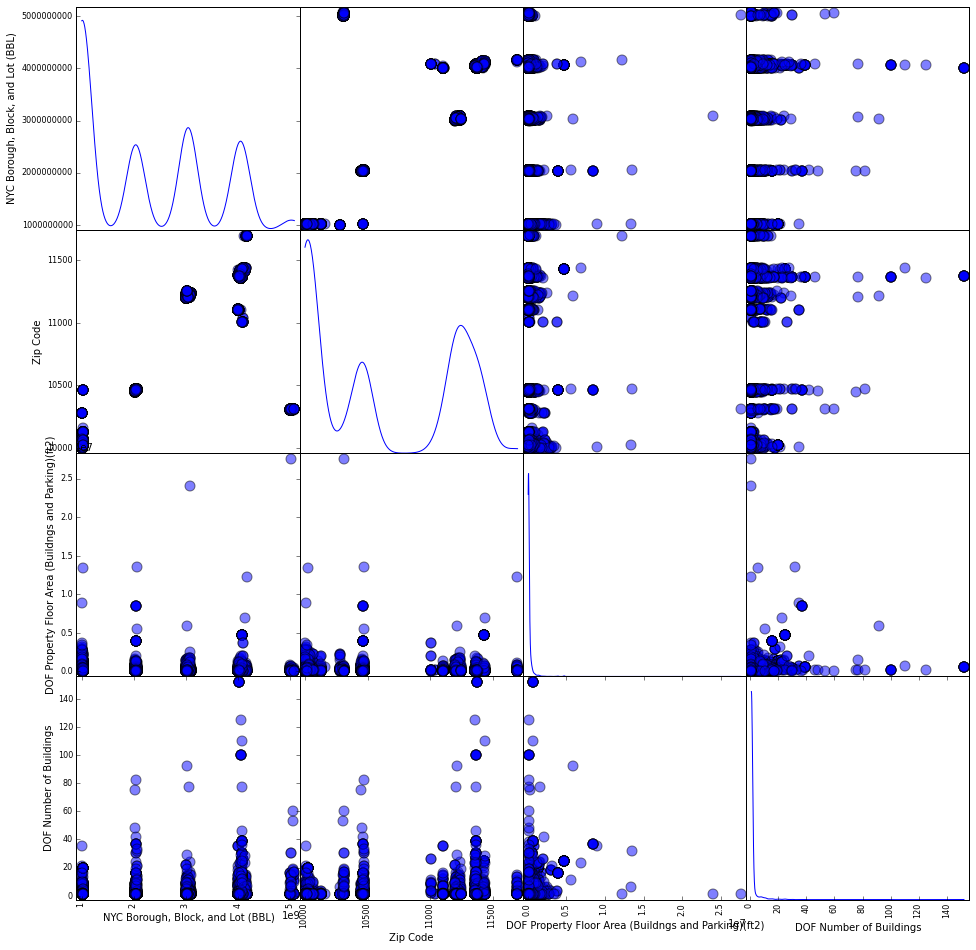

In [144]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=400, figsize=(16, 16), diagonal='kde')

In [145]:
 
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [146]:
#index = np.vectorize('mydata')
#in_1 = np.nrg(u'Site EUI(kBtu/ft2)',(~index))
#in_2 = np.nrg(u'Reported Property Floor Area (Building(s)) (ft²)',(~index))


In [147]:
index = np.vectorize(canconvert)
index_1 = index(nrg['Site EUI(kBtu/ft2)'])
index_2 = index(nrg['Reported Property Floor Area (Building(s)) (ft²)'])

In [148]:
nrg['Site EUI(kBtu/ft2)'][~index_1]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~index_2]=float('NaN')


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [149]:
nrg.renamed =nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, inplace=True)

In [150]:
nrg.renamed = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [252]:
#merging data sets
bblnrgdata = pd.merge(nrg,bsize,on='BBL')

In [251]:
#let's see that the name was indeed changed: 
print bblnrgdata.columns

Index([                                                u'BBL',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [154]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [250]:
#tried to rename the cell name but it didn't work so I created this assignment with the wrong var just to not let that stop me
bblnrgdata.renamed= bblnrgdata.rename(columns={'Direct GHG Emissions(MtCO2e)' : 'GHG_Emissions'}, inplace=True)
                            

In [204]:
print bblnrgdata.columns

Index([                                                u'BBL',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [236]:
nrg["Total GHG Emissions(MtCO2e)"] = nrg["Total GHG Emissions(MtCO2e)"].map(str).map(str.strip)
nrg["BBLs Co-reported"] = nrg["BBLs Co-reported"].map(str).map(str.strip)


In [240]:
#x = bblnrgdata['UnitsRes']
x = bblnrgdata['UnitsTotal']
y = bblnrgdata['YearBuilt']

In [241]:
print x.mean()
print y.mean()

108.214514897
1934.636822


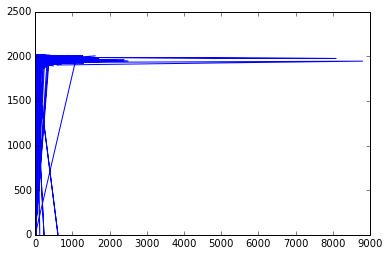

In [242]:
pylab.plot(x,y)
pylab.xlim=(1000,1e10)
pylab.ylim=(1,1000)

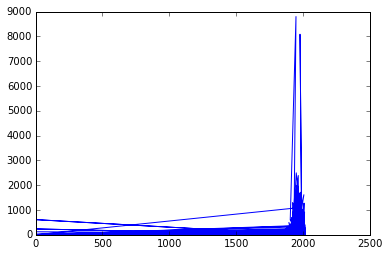

In [253]:
# and now switch between x and y (dependent and indepent)
pylab.plot(y,x)
pylab.xlim=(1000,1e10)
pylab.ylim=(1,1000)

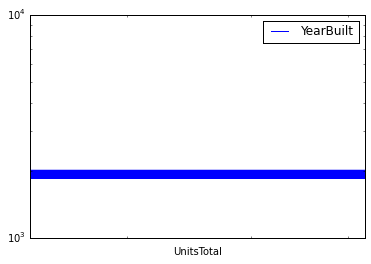

In [244]:
#LOG..
df1 = pd.DataFrame(data=y, index=x)

df1.plot(loglog=True)

plt.show()

In [245]:
bblnrgdata_cut = bblnrgdata[bblnrgdata.UnitsRes>1000]
bblnrgdata_cut['YearBuilt'][bblnrgdata_cut['YearBuilt']<1800]=1800

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [246]:
X = sm.add_constant(np.log10(x))
print X
model = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN
fit = model.fit()
return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

      const  UnitsTotal
0         1    1.380211
1         1    1.792392
2         1    1.929419
3         1    2.107210
4         1    1.000000
5         1    1.785330
6         1    2.686636
7         1    2.656098
8         1    1.000000
9         1    1.792392
10        1    1.832509
11        1    1.949390
12        1    0.954243
13        1    1.579784
14        1    0.698970
15        1    1.857332
16        1    1.748188
17        1    1.792392
18        1    1.977724
19        1    1.785330
20        1    1.755875
21        1    1.785330
22        1    2.720986
23        1    1.724276
24        1    1.633468
25        1    1.819544
26        1    2.290035
27        1    2.260071
28        1    1.623249
29        1    1.556303
...     ...         ...
6515      1    1.892095
6516      1        -inf
6517      1    0.301030
6518      1    2.502427
6519      1    1.732394
6520      1    1.799341
6521      1    1.380211
6522      1    1.832509
6523      1    1.079181
6524      1    1

AttributeError: 'OLSResults' object has no attribute 'fit'

In [254]:
# because I wasn't able to read the right culumns I can't really come with conclusions about the data and the ploting.. 